In [1]:
# !pip install pyshp
# !pip install shapely
# !pip install descartes
# !pip install plotly

In [2]:
# import plotly 
# plotly.tools.set_credentials_file(username='mzohaib', api_key='8tVNgmSM6ya1FURU4PJL')

In [1]:
import plotly.plotly as py
from plotly.graph_objs import *

trace0 = Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = Data([trace0, trace1])

py.iplot(data, filename = 'basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mzohaib/0 or inside your plot.ly account where it is named 'basic-line'


In [15]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

import plotly.plotly as py

ImportError: No module named plotly.plotly

In [3]:
shp_file_name='National_Constituency_Boundary'
data_dir='../national-constituency-boundary/'

In [4]:
sf = shapefile.Reader(data_dir+shp_file_name)

In [5]:
print 'number of shapes imported:',len(sf.shapes())
print ' '
print 'geometry attributes in each shape:'
for name in dir(sf.shape()):
    if not name.startswith('__'):
       print name

number of shapes imported: 273
 
geometry attributes in each shape:
bbox
parts
points
shapeType


(69.39543699981675, 70.62796899976014)

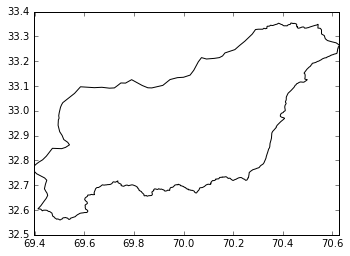

In [6]:
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
shape_ex = sf.shape(4)
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

plt.plot(x_lon,y_lat,'k') 

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

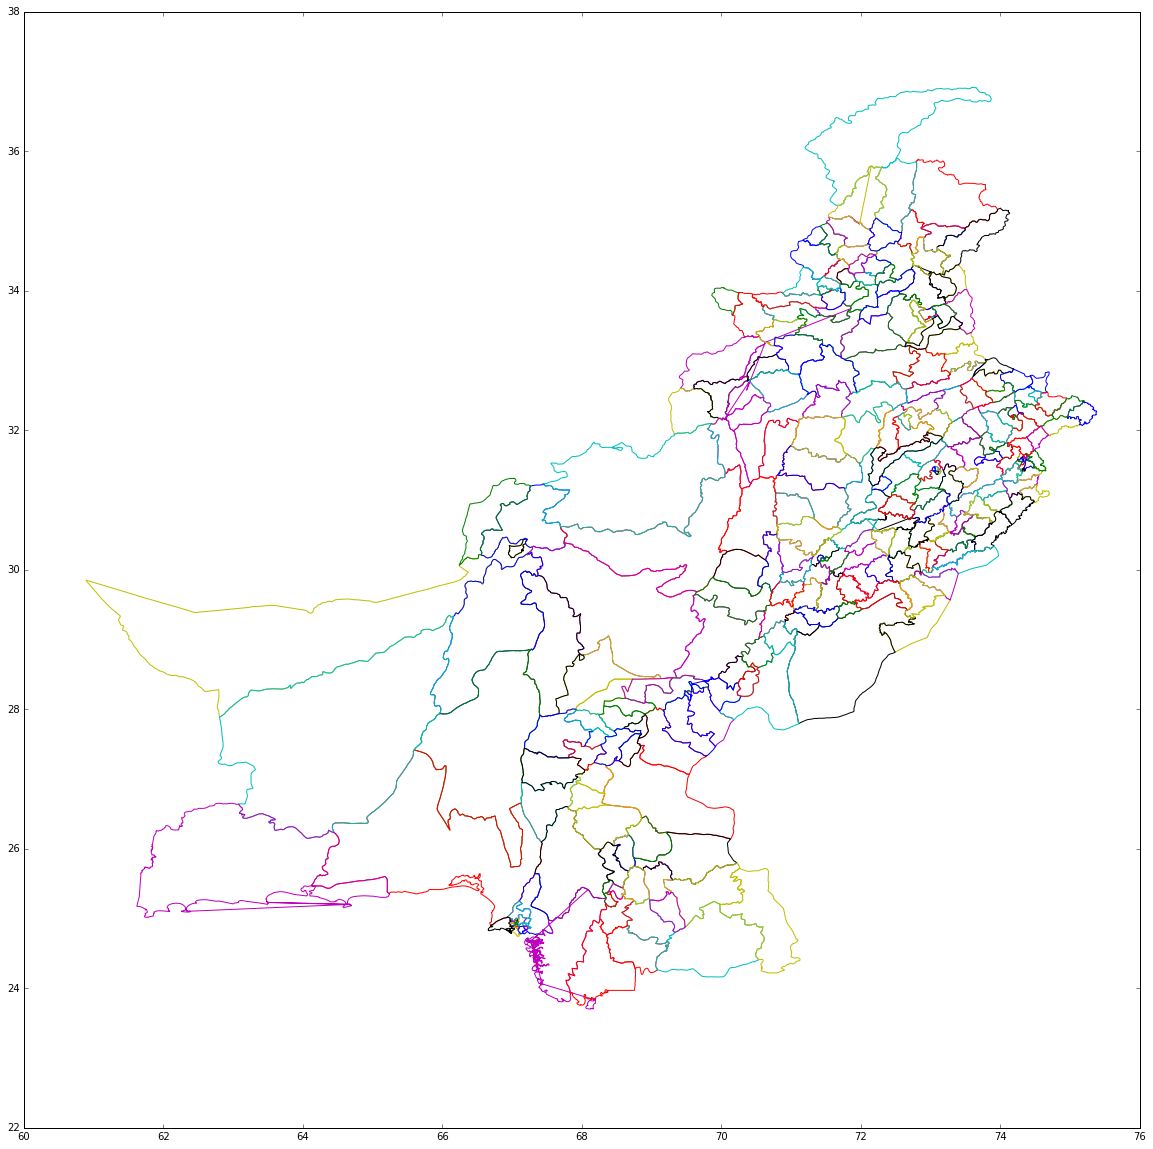

In [7]:
plt.figure(figsize=(20,20))
ax = plt.axes()
ax.set_aspect('equal')
for shape in list(sf.iterShapes()):
    x_lon = np.zeros((len(shape.points),1))
    y_lat = np.zeros((len(shape.points),1))
    for ip in range(len(shape.points)):
        x_lon[ip] = shape.points[ip][0]
        y_lat[ip] = shape.points[ip][1]

    plt.plot(x_lon,y_lat)

#plt.xlim(-130,-60)
#plt.ylim(23,50)

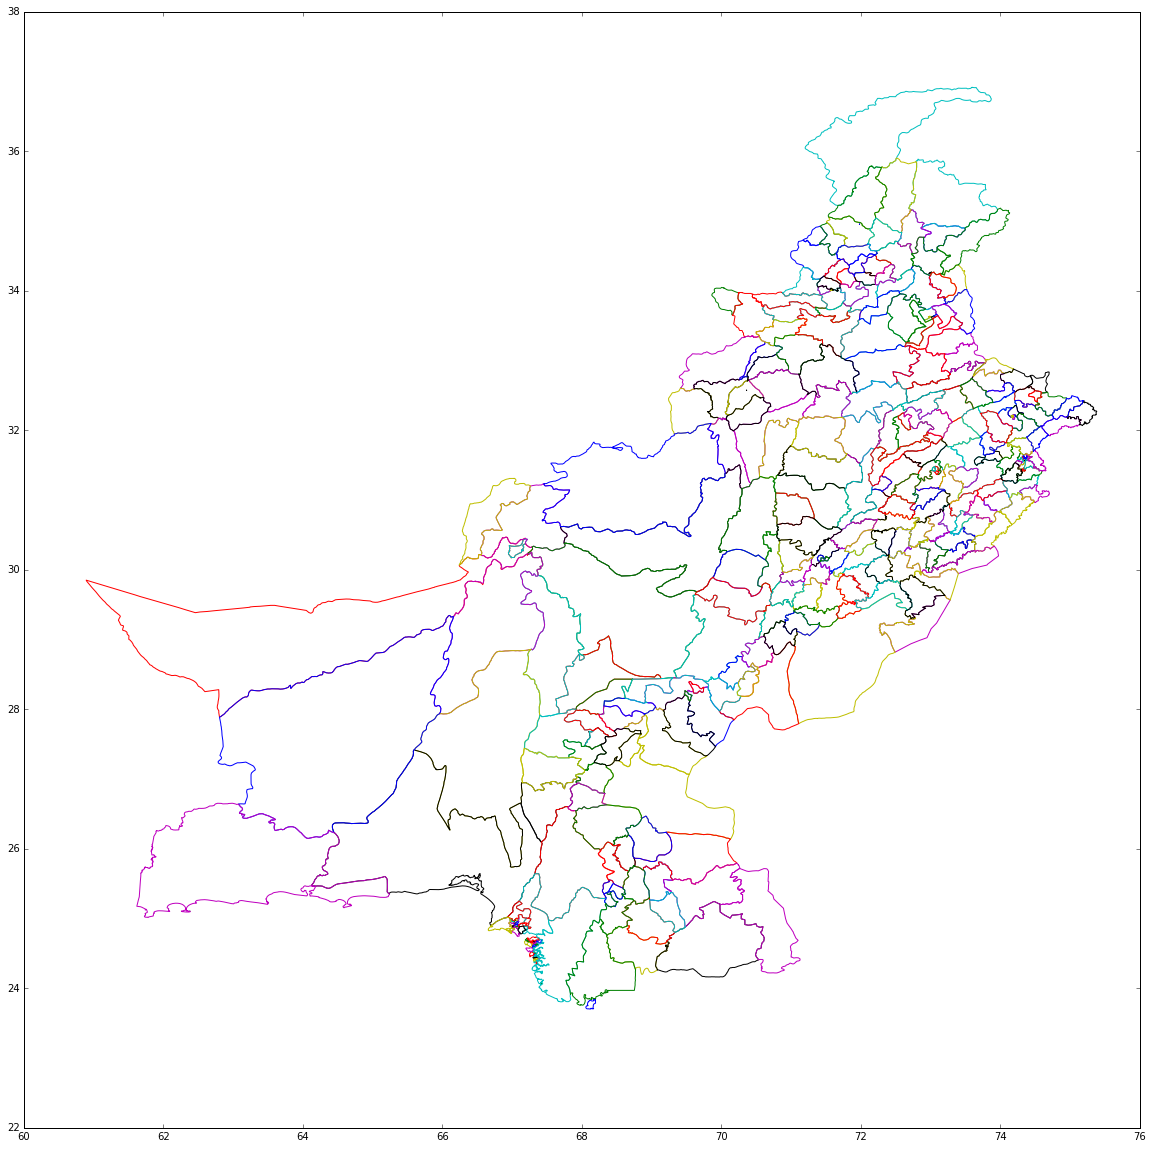

In [8]:
""" PLOTS ALL SHAPES AND PARTS """
plt.figure(figsize=(20,20))
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints= len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon,y_lat) 

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints
            
            seg=shape.points[i0:i1+1]
            x_lon = np.zeros((len(seg),1))
            y_lat = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                x_lon[ip] = seg[ip][0]
                y_lat[ip] = seg[ip][1]
            
            plt.plot(x_lon,y_lat) 

#plt.xlim(-130,-60)
#plt.ylim(23,50)
plt.show()

(31.947082519531307, 32.60467529296875)

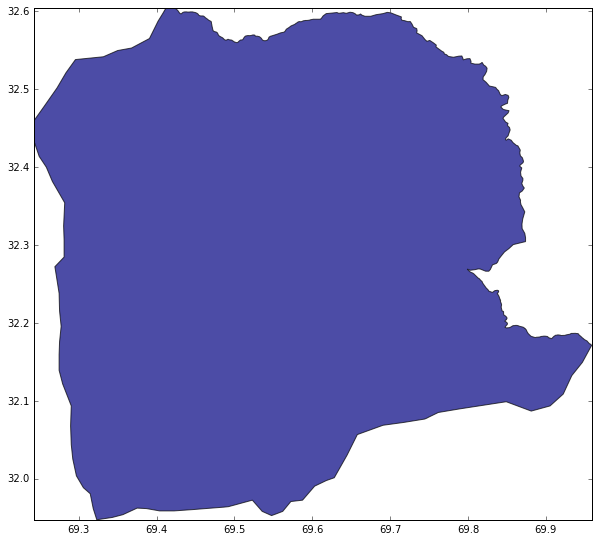

In [9]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_aspect('equal')

shape_ex = sf.shape(5) # could break if selected shape has multiple polygons. 

# build the polygon from exterior points
polygon = Polygon(shape_ex.points)
patch = PolygonPatch(polygon, facecolor=[0,0,0.5], edgecolor=[0,0,0], alpha=0.7, zorder=2)
ax.add_patch(patch)

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
plt.ylim(shape_ex.bbox[1],shape_ex.bbox[3])

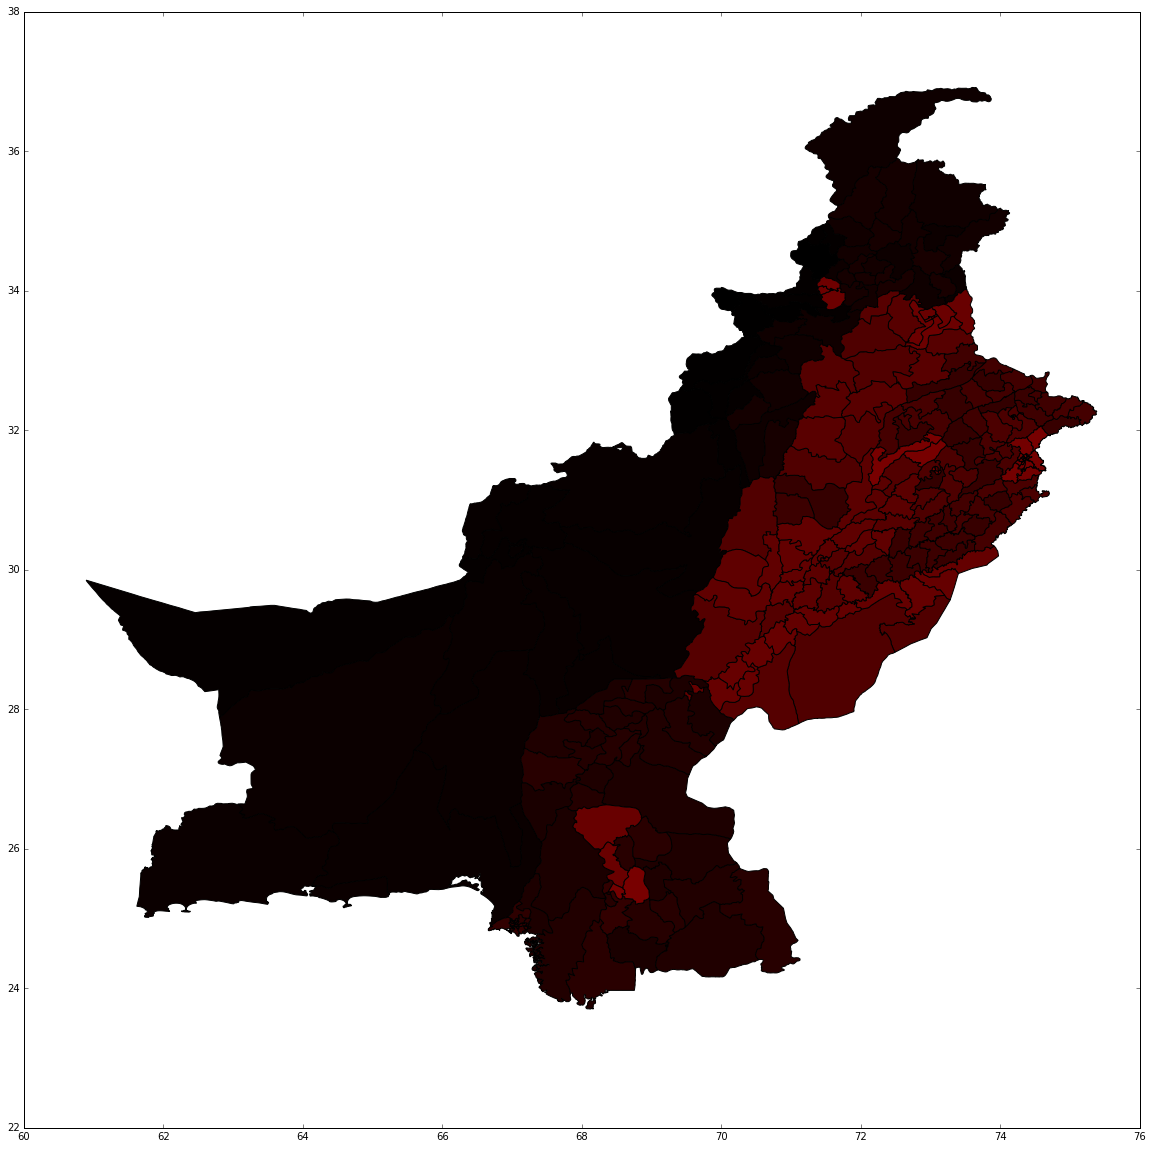

In [10]:
""" PLOTS ALL SHAPES AND PARTS """
plt.figure(figsize=(20,20))
ax = plt.axes() # add the axes
ax.set_aspect('equal')

icolor = 1
for shape in list(sf.iterShapes()):

    # define polygon fill color (facecolor) RGB values:
    R = (float(icolor)-1.0)/577.0
    G = 0
    B = 0

    # check number of parts (could use MultiPolygon class of shapely?)
    nparts = len(shape.parts) # total parts
    if nparts == 1:
        polygon = Polygon(shape.points)
        patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
        ax.add_patch(patch)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = len(shape.points)

            polygon = Polygon(shape.points[i0:i1+1])
            patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
            ax.add_patch(patch)

    icolor = icolor + 1

plt.xlim(60,76)
plt.ylim(22,38)
plt.show()

In [11]:
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['Id', 'N', 6, 0],
 ['NA_Cons', 'C', 50, 0],
 ['WON', 'C', 50, 0],
 ['District', 'C', 50, 0],
 ['Province', 'C', 50, 0]]

In [12]:
fld = sf.fields[1:]

In [13]:
field_names = [field[0] for field in fld]
field_names

['Id', 'NA_Cons', 'WON', 'District', 'Province']

In [14]:
for rec in sf.iterRecords():
    print rec

[0, 'NA-36', 'ID', 'MOHAMDAN AGENCY', 'FATA']
[0, 'NA-37', 'ID', 'KURAM AGENCY', 'FATA']
[0, 'NA-38', 'ID', 'KURAM AGENCY', 'FATA']
[0, 'NA-39', 'ID', 'ORAKZAI AGENCY', 'FATA']
[0, 'NA-40', 'ID', 'NORTH WAZIRASTAN', 'FATA']
[0, 'NA-41', 'ID', 'SOUTH WAZIRASTAN', 'FATA']
[0, 'NA-42', 'ID', 'SOUTH WAZIRASTAN', 'FATA']
[0, 'NA-43', 'ID', 'BAJAUR AGENCY', 'FATA']
[0, 'NA-44', 'ID', 'BAJAUR AGENCY', 'FATA']
[0, 'NA-46', 'ID', 'KHYBER AGENCY', 'FATA']
[0, 'NA-45', 'ID', 'KHYBER AGENCY', 'FATA']
[0, 'NA-47', 'ID', 'F.R AREAS', 'FATA']
[0, 'NA-260', 'PPP', 'QUETTA, CHANGAI AND MASTANG', 'BALOCHISTAN']
[0, 'NA-259', 'PPP', 'QUETTA', 'BALOCHISTAN']
[0, 'NA-261', 'MMA', 'PISHIN AND ZIARAT', 'BALOCHISTAN']
[0, 'NA-262', 'MMA', 'KILA ABDULLAH', 'BALOCHISTAN']
[0, 'NA-263', 'PML(N)', 'LORALAI, MUSA KHEL AND BARKHAN', 'BALOCHISTAN']
[0, 'NA-264', 'ID', 'ZOB AN KILHA SIAFULLAH', 'BALOCHISTAN']
[0, 'NA-265', 'PML', 'SIBI, KOHLU,HARNAI AND DERA BUGTI', 'BALOCHISTAN']
[0, 'NA-266', 'PPP', 'NASIRABAD AND 

In [ ]:
""" Find max/min of record of interest (for scaling the facecolor)"""

# get list of field names, pull out appropriate index
# fieldnames of interest: ALAND, AWATER are land and water area, respectively
fld = sf.fields[1:]
field_names = [field[0] for field in fld]
# fld_name='ALAND'
# fld_ndx=field_names.index(fld_name)